In [1]:
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
personas = pd.read_csv('..\\..\\Datos\\working\\personas_cotizacion4.csv',encoding = "ISO-8859-1")
personas.head(2)

# Ready Data Set

print(personas.shape)
# print(personas.columns)
drop_columns = [personas.columns[0], 'rut', 'negocio', 'max_rango_edad', 'is_profesion']

p_negocio = personas.negocio
personas = personas.drop(drop_columns, axis=1)

print(personas.shape)
print(p_negocio.shape)

personas = pd.get_dummies(personas)

print(personas.shape)
# personas.describe()

print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

X = personas
y = p_negocio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(6184, 34)
(6184, 29)
(6184,)
(6184, 173)
Tamaño Total:  (6184, 173)
Personas que hicieron Negocio:  (1101,)
Personas que no Hicieorn Negocio:  (5083,)
(4328, 173) (1856, 173) (4328,) (1856,)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
def plot_confusion_matrix(model,X,y,y_pred):
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,5))
    sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Acc: {0}'.format(model.score(X, y))
    plt.title(all_sample_title, size = 10);
    plt.show()
    
def roc_curve_plot(model, X_test, y_test):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# 3. Advanced Ensemble techniques

## 3.1 Stacking
Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set. Below is a step-wise explanation for a simple stacked ensemble:

In [5]:
# from sklearn.model_selection import StratifiedKFold

# def Stacking(model, train, y, test, n_fold):
    
#     folds = StratifiedKFold(n_splits=n_fold,random_state=1)
    
#     test_pred = np.empty((test.shape[0],1),float)
#     train_pred = np.empty((0,1),float)
    
#     for train_indices, val_indices in folds.split(train, y.values):
#         x_train, x_val = train.iloc[train_indices], train.iloc[val_indices]
#         y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]

#         model.fit(X=x_train, y=y_train)
        
#         train_pred = np.append(train_pred, model.predict(x_val))
#         test_pred = np.append(test_pred, model.predict(test))
    
#     return test_pred.reshape(-1,1), train_pred

In [6]:
# model1 = dtree

# test_pred1 ,train_pred1 = Stacking(model=model1, n_fold=10, train=X_train, test=X_test, y=y_train)

# train_pred1 = pd.DataFrame(train_pred1)
# test_pred1 = pd.DataFrame(test_pred1)

# print(train_pred1.shape)
# print(test_pred1.shape)

In [7]:
# model2 = KNeighborsClassifier()

# test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

# train_pred2=pd.DataFrame(train_pred2)
# test_pred2=pd.DataFrame(test_pred2)

# print(train_pred2.shape)
# print(test_pred2.shape)

In [8]:
# df = pd.concat([train_pred1, train_pred2], axis=1)
# df_test = pd.concat([test_pred1, test_pred2], axis=1)

# print(df.shape, y_train.shape)
# print(df_test.shape, y_test.shape)

In [9]:
# model = LogisticRegression(random_state=1)
# model.fit(df,y_train)
# model.score(df_test, y_test)

## 3.2 Blending
Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. Here is a detailed explanation of the blending process

In [10]:
# model1 = DecisionTreeClassifier()
# model1.fit(X_train, y_train)
# val_pred1 = model1.predict(x_val)
# test_pred1 = model1.predict(x_test)
# val_pred1 = pd.DataFrame(val_pred1)
# test_pred1 = pd.DataFrame(test_pred1)

# model2 = KNeighborsClassifier()
# model2.fit(X_train,y_train)
# val_pred2 = model2.predict(x_val)
# test_pred2 = model2.predict(x_test)
# val_pred2 = pd.DataFrame(val_pred2)
# test_pred2 = pd.DataFrame(test_pred2)

In [11]:
# df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
# df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

# model = LogisticRegression()
# model.fit(df_val,y_val)
# model.score(df_test,y_test)

## 3.3 Bagging


# 4 Approach to handling Imbalanced Datasets

In [12]:
# logistic = LogisticRegression(C=3.727593720314938, class_weight='balanced', dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
#           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

logistic = LogisticRegression(C=0.4393970560760795, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=27, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 2.2.1. Bagging Based

C:\Users\joaquin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.84764543 0.84188627 0.85991678]
0.8498161602268318
[[1340  181]
 [  84  251]]
             precision    recall  f1-score   support

      False       0.94      0.88      0.91      1521
       True       0.58      0.75      0.65       335

avg / total       0.88      0.86      0.86      1856



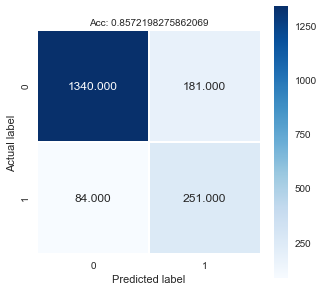

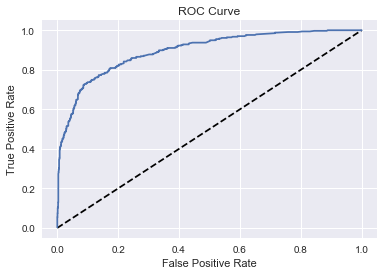

In [13]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

bagging = BaggingClassifier(logistic, max_samples=0.2, random_state=42)
scores = cross_val_score(bagging, X_train, y_train)
# print(bagging.base_estimator)
mean= scores.mean()
print(scores)
print(mean)


bagging.fit(X_train,y_train)
y_pred = bagging.predict(X_test)

plot_confusion_matrix(bagging, X_test, y_test, y_pred)
roc_curve_plot(bagging, X_test, y_test)

[0.82202216 0.82454924 0.8370319 ]
0.8278677659913708
[[1324  197]
 [  77  258]]
             precision    recall  f1-score   support

      False       0.95      0.87      0.91      1521
       True       0.57      0.77      0.65       335

avg / total       0.88      0.85      0.86      1856



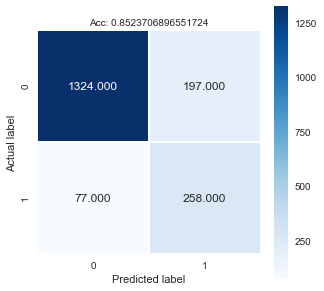

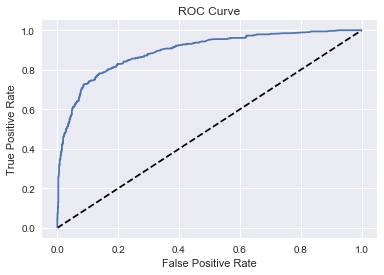

In [14]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# digits = load_digits()
# data = scale(digits.data)
# X = data
# y = digits.target
X = personas
y = p_negocio

# bagging = BaggingClassifier(logistic, max_samples=0.2)
bagging = BalancedBaggingClassifier(logistic, max_samples=0.2, random_state=42)
scores = cross_val_score(bagging, X_train, y_train)
# print(bagging.base_estimator)
mean= scores.mean()
print(scores)
print(mean)


bagging.fit(X_train,y_train)
y_pred = bagging.predict(X_test)


plot_confusion_matrix(bagging, X_test, y_test, y_pred)
roc_curve_plot(bagging, X_test, y_test)

In [15]:
# from sklearn.cross_validation import cross_val_score
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.datasets import load_digits
# from sklearn.preprocessing import scale

# digits = load_digits()
# data = scale(digits.data)
# X = data
# y = digits.target
# # X = personas
# # y = p_negocio

# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1.0, random_state=0)
# scores = cross_val_score(clf, X, y)
# print(scores)

# clf = RandomForestClassifier(n_estimators=1, max_depth=None, min_samples_split=1.0, random_state=0)
# scores = cross_val_score(clf, X, y)
# print(scores)

# clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=1.0, random_state=0)
# scores = cross_val_score(clf, X, y)
# print(scores)

# AdaBoostClassifier

In [16]:

# from collections import Counter
# import itertools

# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import BaggingClassifier
# from sklearn.metrics import confusion_matrix

# from imblearn.datasets import make_imbalance
# from imblearn.ensemble import BalancedBaggingClassifier

# from imblearn.metrics import classification_report_imbalanced


# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')


# # iris = load_iris()
# # X, y = make_imbalance(iris.data, iris.target, ratio={0: 25, 1: 40, 2: 50},
# #                       random_state=0)

# X = personas
# y = p_negocio
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# bagging = BaggingClassifier(random_state=0)
# balanced_bagging = BalancedBaggingClassifier(random_state=0)

# print('Class distribution of the training set: {}'.format(Counter(y_train)))

# bagging.fit(X_train, y_train)
# balanced_bagging.fit(X_train, y_train)

# print('Class distribution of the test set: {}'.format(Counter(y_test)))

# print('Classification results using a bagging classifier on imbalanced data')
# y_pred_bagging = bagging.predict(X_test)
# print(classification_report_imbalanced(y_test, y_pred_bagging))
# cm_bagging = confusion_matrix(y_test, y_pred_bagging)
# plt.figure()
# plot_confusion_matrix(cm_bagging, classes=[0,1],
#                       title='Confusion matrix using BaggingClassifier')

# print('Classification results using a bagging classifier on balanced data')
# y_pred_balanced_bagging = balanced_bagging.predict(X_test)
# print(classification_report_imbalanced(y_test, y_pred_balanced_bagging))
# cm_balanced_bagging = confusion_matrix(y_test, y_pred_balanced_bagging)
# plt.figure()
# plot_confusion_matrix(cm_balanced_bagging, classes=[0,1],
#                       title='Confusion matrix using BalancedBaggingClassifier')

# plt.show()

In [17]:
# import numpy as np
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.cross_validation import cross_val_score
# from sklearn.datasets.mldata import fetch_mldata

# n_estimators = 400
# learning_rate = 1

# # heart = fetch_mldata('heart')
# # X = heart.data
# # y = np.copy(heart.target)
# # y[y==-1] = 0

# # X_test, y_test = X[189:], y[189:]
# # X_train, y_train = X[:189], y[:189]

# # X = personas
# # y = p_negocio

# dt_stump =dtree
# dt_stump.fit(X_train, y_train)
# dt_stmp_err = 1.0 - dt_stump.score(X_test, y_test)

# dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
# dt.fit(X_train, y_train)
# dt_err = 1.0 - dt.score(X_test, y_test)

# # n_estimators = number of weak learners
# # base_estimator use to define other weak learners
# ada_discrete = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=learning_rate, 
#                                   n_estimators=n_estimators, algorithm='SAMME')
# ada_discrete.fit(X_train, y_train)
# scores = cross_val_score(ada_discrete, X_test, y_test)
# print(scores)
# means = scores.mean()
# print(means)

In [18]:
# #AdaBoostClassifier
# print(__doc__)

# # Author: Noel Dawe <noel.dawe@gmail.com>
# #
# # License: BSD 3 clause

# from sklearn.externals.six.moves import zip

# import matplotlib.pyplot as plt

# from sklearn.datasets import make_gaussian_quantiles
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier


# # X, y = make_gaussian_quantiles(n_samples=13000, n_features=10,
# #                                n_classes=3, random_state=1)

# # n_split = 3000

# # X_train, X_test = X[:n_split], X[n_split:]
# # y_train, y_test = y[:n_split], y[n_split:]

# # bdt_real = AdaBoostClassifier(
# #     DecisionTreeClassifier(max_depth=2),
# #     n_estimators=600,
# #     learning_rate=1)

# bdt_real = AdaBoostClassifier(dtree, n_estimators=600, learning_rate=1)

# bdt_discrete = AdaBoostClassifier(dtree, n_estimators=600, learning_rate=1.5, algorithm="SAMME")

# # bdt_discrete = AdaBoostClassifier(
# #     DecisionTreeClassifier(max_depth=2),
# #     n_estimators=600,
# #     learning_rate=1.5,
# #     algorithm="SAMME")

# bdt_real.fit(X_train, y_train)
# bdt_discrete.fit(X_train, y_train)

# real_test_errors = []
# discrete_test_errors = []

# for real_test_predict, discrete_train_predict in zip(
#         bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
#     real_test_errors.append(
#         1. - accuracy_score(real_test_predict, y_test))
#     discrete_test_errors.append(
#         1. - accuracy_score(discrete_train_predict, y_test))

# n_trees_discrete = len(bdt_discrete)
# n_trees_real = len(bdt_real)

# # Boosting might terminate early, but the following arrays are always
# # n_estimators long. We crop them to the actual number of trees here:
# discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
# real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
# discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

# plt.figure(figsize=(15, 5))

# plt.subplot(131)
# plt.plot(range(1, n_trees_discrete + 1),
#          discrete_test_errors, c='black', label='SAMME')
# plt.plot(range(1, n_trees_real + 1),
#          real_test_errors, c='black',
#          linestyle='dashed', label='SAMME.R')
# plt.legend()
# plt.ylim(0.18, 0.62)
# plt.ylabel('Test Error')
# plt.xlabel('Number of Trees')

# plt.subplot(132)
# plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
#          "b", label='SAMME', alpha=.5)
# plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
#          "r", label='SAMME.R', alpha=.5)
# plt.legend()
# plt.ylabel('Error')
# plt.xlabel('Number of Trees')
# plt.ylim((.2,
#          max(real_estimator_errors.max(),
#              discrete_estimator_errors.max()) * 1.2))
# plt.xlim((-20, len(bdt_discrete) + 20))

# plt.subplot(133)
# plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
#          "b", label='SAMME')
# plt.legend()
# plt.ylabel('Weight')
# plt.xlabel('Number of Trees')
# plt.ylim((0, discrete_estimator_weights.max() * 1.2))
# plt.xlim((-20, n_trees_discrete + 20))

# # prevent overlapping y-axis labels
# plt.subplots_adjust(wspace=0.25)
# plt.show()

# Bagging

In [19]:
# # Authors: Christos Aridas
# #          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# # License: MIT

# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import interp
# from sklearn import datasets, neighbors
# from sklearn.metrics import auc, roc_curve
# from sklearn.model_selection import StratifiedKFold

# from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
# from imblearn.pipeline import make_pipeline

# print(__doc__)

# LW = 2
# RANDOM_STATE = 42


# class DummySampler(object):

#     def sample(self, X, y):
#         return X, y

#     def fit(self, X, y):
#         return self

#     def fit_sample(self, X, y):
#         return self.sample(X, y)


# cv = StratifiedKFold(n_splits=3)

# # Load the dataset
# data = datasets.fetch_lfw_people()
# majority_person = 1871  # 530 photos of George W Bush
# minority_person = 531  # 29 photos of Bill Clinton
# majority_idxs = np.flatnonzero(data.target == majority_person)
# minority_idxs = np.flatnonzero(data.target == minority_person)
# idxs = np.hstack((majority_idxs, minority_idxs))

# X = data.data[idxs]
# y = data.target[idxs]
# y[y == majority_person] = 0
# y[y == minority_person] = 1

# classifier = ['3NN', neighbors.KNeighborsClassifier(3)]

# samplers = [
#     ['Standard', DummySampler()],
#     ['ADASYN', ADASYN(random_state=RANDOM_STATE)],
#     ['ROS', RandomOverSampler(random_state=RANDOM_STATE)],
#     ['SMOTE', SMOTE(random_state=RANDOM_STATE)],
# ]

# pipelines = [
#     ['{}-{}'.format(sampler[0], classifier[0]),
#      make_pipeline(sampler[1], classifier[1])]
#     for sampler in samplers
# ]

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# for name, pipeline in pipelines:
#     mean_tpr = 0.0
#     mean_fpr = np.linspace(0, 1, 100)
#     for train, test in cv.split(X, y):
#         probas_ = pipeline.fit(X[train], y[train]).predict_proba(X[test])
#         fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
#         mean_tpr += interp(mean_fpr, fpr, tpr)
#         mean_tpr[0] = 0.0
#         roc_auc = auc(fpr, tpr)

#     mean_tpr /= cv.get_n_splits(X, y)
#     mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr)
#     plt.plot(mean_fpr, mean_tpr, linestyle='--',
#              label='{} (area = %0.2f)'.format(name) % mean_auc, lw=LW)

# plt.plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k',
#          label='Luck')

# # make nice plotting
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()
# ax.spines['left'].set_position(('outward', 10))
# ax.spines['bottom'].set_position(('outward', 10))
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')

# plt.legend(loc="lower right")

# plt.show()

In [20]:
# #Bagging
# from sklearn.ensemble import BaggingClassifier
# from sklearn import tree
# model = BaggingClassifier(
#     tree.DecisionTreeClassifier(
#         random_state=1,
#         criterion= 'gini', 
#         max_depth=1,
#         max_features=7, 
#         min_samples_leaf=6)
# )
# model.fit(X_train, y_train)
# model.score(X_test, y_test)
# y_pred = model.predict(X_test)
# plot_confusion_matrix(model, X_test, y_test, y_pred)


In [21]:
# # ADABOOST
# from sklearn.ensemble import AdaBoostClassifier
# model = AdaBoostClassifier(random_state=1)
# model.fit(X_train, y_train)
# model.score(X_test,y_test)
# y_pred = model.predict(X_test)
# plot_confusion_matrix(model,X_test,y_test,y_pred)

In [22]:
# import xgboost as xgb
# model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
# model.fit(X_train, y_train)
# model.score(X_test,y_test)
# y_pred = model.predict(X_test)
# plot_confusion_matrix(model,X_test,y_test,y_pred)

In [23]:
# import lightgbm as lgb
# train_data=lgb.Dataset(X_train,label=y_train)
# #define parameters
# params = {'learning_rate':0.001}
# model= lgb.train(params, train_data, 100) 
# y_pred=model.predict(X_test)
# for i in range(0,185):
#     if y_pred[i]>=0.5: 
#         y_pred[i]=1
# else: 
#     y_pred[i]=0


In [24]:
# from catboost import CatBoostClassifier
# model=CatBoostClassifier()
# # categorical_features_indices = np.where(df.dtypes != np.float)[0]
# model.fit(X_train,y_train,eval_set=(X_test, y_test))
# model.score(X_test,y_test)
# y_pred = model.predict(X_test)
# plot_confusion_matrix(model,X_test,y_test,y_pred)